In [1]:
import csv
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import math


filename = input()
with open(filename, 'r') as file:
    data = csv.reader(file, delimiter=';')
    data = list(data)
    y_list = []
    x_list = []
    for i in range(len(data)):
        x_list.append(eval(data[i][0]))
        y_list.append(eval(data[i][1]))
print(x_list)
print(y_list)

data1.csv
[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150]
[-2, -9, -5, 4, 2, 8, 0, 6, -4, 0, -5, -2, -4, 10, -8, 0, -9, 5, -1, 3, -1, -5, -8, 0, -10, 8, 0, -5, -1, 5, 9, -9, 7, 10, 10, 1, -3, -3, -3, 0, 4, -4, 8, 6, 10, -8, -10, 9, -1, 7]


In [2]:
#метод Лагранжа
x = symbols('x')
L = 0
l = []
f_list = []
massiv = []

for j in range(len(x_list)):
    l.append(1)
    for k in range(len(x_list)):
        if k!=j:
            l[j] *= ((x-x_list[k])/(x_list[j]-x_list[k]))

            
for j in range(len(x_list)):
    L += y_list[j]*l[j]
    
for i in range(len(x_list)):
    f_list.append(L.subs(x, x_list[i]))
    
for i in range(len(x_list)):
    massiv.append([])
    massiv[i].append(x_list[i])
    massiv[i].append(y_list[i])
    massiv[i].append(f_list[i])
    
print(massiv)
print(f'Многочлен Лагранжа: {simplify(L)}')

[[3, -2, -2], [6, -9, -9], [9, -5, -5], [12, 4, 4], [15, 2, 2], [18, 8, 8], [21, 0, 0], [24, 6, 6], [27, -4, -4], [30, 0, 0], [33, -5, -5], [36, -2, -2], [39, -4, -4], [42, 10, 10], [45, -8, -8], [48, 0, 0], [51, -9, -9], [54, 5, 5], [57, -1, -1], [60, 3, 3], [63, -1, -1], [66, -5, -5], [69, -8, -8], [72, 0, 0], [75, -10, -10], [78, 8, 8], [81, 0, 0], [84, -5, -5], [87, -1, -1], [90, 5, 5], [93, 9, 9], [96, -9, -9], [99, 7, 7], [102, 10, 10], [105, 10, 10], [108, 1, 1], [111, -3, -3], [114, -3, -3], [117, -3, -3], [120, 0, 0], [123, 4, 4], [126, -4, -4], [129, 8, 8], [132, 6, 6], [135, 10, 10], [138, -8, -8], [141, -10, -10], [144, 9, 9], [147, -1, -1], [150, 7, 7]]
Многочлен Лагранжа: 4450083429677*x**49/568599382994335629301680237459894448407172840574789998794898144214982328320000000000 - 1078295969519143*x**48/36674588573078841295346470342588304054481291808300891834591565865214279680000000000 + 443394351526887121*x**47/8251782428942739291452955827082368412258290656867700662783102319

In [4]:
x_values1 = []
y_values1 = []
for det_x in np.linspace(x_list[0], x_list[-1], num=(x_list[-1] - x_list[0])):
    x_values1.append(det_x)
    y_values1.append(L.subs(x, det_x))

In [5]:
#метод Ньютона
nuton_passed = True
for i in range(len(x_list)-2):
    if (x_list[i+1] - x_list[i]) != (x_list[i+2] - x_list[i+1]):
        print('Данный метод применим только для равноотстоящих узлов!')
        nuton_passed = False
        break
else: 
    #конечные разности
    d = []
    d.append(y_list)
    for i in range(len(y_list)-1):
        temp = d[i]
        d.append([])
        for j in range(len(temp)-1):
            d[i+1].append(temp[j+1]-temp[j])
    
    
    #интерполяция вперед 
    x = symbols('x')
    h = x_list[1] - x_list[0]
    n = len(x_list)-1
    qv = (x - x_list[0])/h
    Pv = 0
    qspisv = []
    qspisv.append(1)
    for i in range(n):
        tmep = qspisv[i]
        qspisv.append(tmep*(qv-i))

    for i in range(n+1):
        Pv += qspisv[i]*d[i][0]/np.math.factorial(i)

    print(Pv)
    mass_Pv = []
    for i in range(len(x_list)):
        mass_Pv.append([])
        mass_Pv[i].append(x_list[i])
        mass_Pv[i].append(y_list[i])
        mass_Pv[i].append(Pv.subs(x, x_list[i]))

    print(mass_Pv)

    #интерполяция назад
    x = symbols('x')
    h = x_list[1] - x_list[0]
    n = len(x_list)-1
    qn = (x - x_list[-1])/h
    Pn = 0
    qspisn = []
    qspisn.append(1)
    for i in range(n):
        tmep = qspisn[i]
        qspisn.append(tmep*(qn+i))

    for i in range(n+1):
        Pn += qspisn[i]*d[i][-1]/np.math.factorial(i)

    print(Pn)
    mass_Pn = []
    for i in range(len(x_list)):
        mass_Pn.append([])
        mass_Pn[i].append(x_list[i])
        mass_Pn[i].append(y_list[i])
        mass_Pn[i].append(Pn.subs(x, x_list[i]))

    print(mass_Pn)

-7*x/3 + 4450083429677*(x/3 - 49)*(x/3 - 48)*(x/3 - 47)*(x/3 - 46)*(x/3 - 45)*(x/3 - 44)*(x/3 - 43)*(x/3 - 42)*(x/3 - 41)*(x/3 - 40)*(x/3 - 39)*(x/3 - 38)*(x/3 - 37)*(x/3 - 36)*(x/3 - 35)*(x/3 - 34)*(x/3 - 33)*(x/3 - 32)*(x/3 - 31)*(x/3 - 30)*(x/3 - 29)*(x/3 - 28)*(x/3 - 27)*(x/3 - 26)*(x/3 - 25)*(x/3 - 24)*(x/3 - 23)*(x/3 - 22)*(x/3 - 21)*(x/3 - 20)*(x/3 - 19)*(x/3 - 18)*(x/3 - 17)*(x/3 - 16)*(x/3 - 15)*(x/3 - 14)*(x/3 - 13)*(x/3 - 12)*(x/3 - 11)*(x/3 - 10)*(x/3 - 9)*(x/3 - 8)*(x/3 - 7)*(x/3 - 6)*(x/3 - 5)*(x/3 - 4)*(x/3 - 3)*(x/3 - 2)*(x/3 - 1)/2376101031383857659657235012973810065967003247575040000000000 - 633457227084061*(x/3 - 48)*(x/3 - 47)*(x/3 - 46)*(x/3 - 45)*(x/3 - 44)*(x/3 - 43)*(x/3 - 42)*(x/3 - 41)*(x/3 - 40)*(x/3 - 39)*(x/3 - 38)*(x/3 - 37)*(x/3 - 36)*(x/3 - 35)*(x/3 - 34)*(x/3 - 33)*(x/3 - 32)*(x/3 - 31)*(x/3 - 30)*(x/3 - 29)*(x/3 - 28)*(x/3 - 27)*(x/3 - 26)*(x/3 - 25)*(x/3 - 24)*(x/3 - 23)*(x/3 - 22)*(x/3 - 21)*(x/3 - 20)*(x/3 - 19)*(x/3 - 18)*(x/3 - 17)*(x/3 - 16)*(x/3

[[3, -2, -2.00000000000000], [6, -9, -9.00000000000000], [9, -5, -5.00000000000000], [12, 4, 4.00000000000000], [15, 2, 2.00000000000000], [18, 8, 8.00000000000000], [21, 0, 0], [24, 6, 6.00000000000000], [27, -4, -4.00000000000000], [30, 0, 0], [33, -5, -5.00000000000000], [36, -2, -2.00000000000000], [39, -4, -4.00000000000000], [42, 10, 10.0000000000000], [45, -8, -8.00000000000000], [48, 0, 0], [51, -9, -9.00000000000000], [54, 5, 5.00000000000000], [57, -1, -1.00000000000000], [60, 3, 3.00000000000000], [63, -1, -1.00000000000000], [66, -5, -5.00000000000000], [69, -8, -8.00000000000000], [72, 0, 0], [75, -10, -10.0000000000000], [78, 8, 8.00000000000000], [81, 0, 0], [84, -5, -5.00000000000000], [87, -1, -1.00000000000000], [90, 5, 5.00000000000000], [93, 9, 9.00000000000000], [96, -9, -9.00000000000000], [99, 7, 7.00000000000000], [102, 10, 10.0000000000000], [105, 10, 10.0000000000000], [108, 1, 1.00000000000000], [111, -3, 5.00000000000000], [114, -3, -21.0000000000000], [117,

[[3, -2, 8867764.00000000], [6, -9, -2093453.00000000], [9, -5, -33746.0000000000], [12, 4, 294670.000000000], [15, 2, -133397.000000000], [18, 8, 763.000000000000], [21, 0, 3.00000000000000], [24, 6, 2937.00000000000], [27, -4, 48.0000000000000], [30, 0, -156.000000000000], [33, -5, -144.000000000000], [36, -2, 22.0000000000000], [39, -4, -4.00000000000000], [42, 10, 10.0000000000000], [45, -8, -8.00000000000000], [48, 0, 0], [51, -9, -9.00000000000000], [54, 5, 5.00000000000000], [57, -1, -1.00000000000000], [60, 3, 3.00000000000000], [63, -1, -1.00000000000000], [66, -5, -5.00000000000000], [69, -8, -8.00000000000000], [72, 0, 0], [75, -10, -10.0000000000000], [78, 8, 8.00000000000000], [81, 0, 0], [84, -5, -5.00000000000000], [87, -1, -1.00000000000000], [90, 5, 5.00000000000000], [93, 9, 9.00000000000000], [96, -9, -9.00000000000000], [99, 7, 7.00000000000000], [102, 10, 10.0000000000000], [105, 10, 10.0000000000000], [108, 1, 1.00000000000000], [111, -3, -3.00000000000000], [114,

In [6]:
x_values2_1 = []
y_values2_1 = []
for det_x in np.linspace(x_list[0], x_list[-1], num=(x_list[-1] - x_list[0])):
    x_values2_1.append(det_x)
    y_values2_1.append(Pv.subs(x, det_x))

x_values2_2 = []
y_values2_2 = []
for det_x in np.linspace(x_list[0], x_list[-1], num=(x_list[-1] - x_list[0])):
    x_values2_2.append(det_x)
    y_values2_2.append(Pv.subs(x, det_x))

In [7]:
def jdmethod_fast(a):
    a = np.array(a, float)
    a_orig = copy.deepcopy(a)
    n = len(a)
    m = len(a[0])
    aobr = np.linalg.inv(a[:, :-1])
    for k in range(n):
        if np.fabs(a[k,k]) < 1.0e-12:
            for i in range(k+1,n):
                if np.fabs(a[i,k]) > np.fabs(a[k,k]):
                    a[[i, k]] = a[[k, i]]
                    break
        pivot = a[k,k]
        a[k] = a[k] / pivot

        a[np.arange(n)!=k] -= a[np.arange(n)!=k][:, k].reshape((n-1, 1)) * a[k]
    return a[:, -1:]

In [8]:
import numpy as np
import copy
#интерполяция кубическими сплайнами
x = symbols('x')
number_of_splines = len(x_list)-1
S = []
a = y_list[:]
b = []
d = []
h = np.array(x_list[1:]) - np.array(x_list[:-1])
C_to_solve = np.zeros((number_of_splines + 1, number_of_splines + 2))
for j in range(number_of_splines + 1):
    if j == 0 or j == number_of_splines:
        C_to_solve[j][j] = 1
    else:
        C_to_solve[j][j - 1] = h[j - 1] / 3
        C_to_solve[j][j] = 2 * (h[j - 1] + h[j]) / 3
        C_to_solve[j][j + 1] = h[j] / 3
        C_to_solve[j][-1] = (y_list[j + 1] - y_list[j]) / h[j] - (y_list[j] - y_list[j - 1]) / h[j - 1]
c = jdmethod_fast(C_to_solve).transpose()[0]
for i in range(number_of_splines):
    d.append((c[i+1] - c[i])/(3*h[i]))
    b.append(((y_list[i+1]-y_list[i])/h[i]) - h[i]*(c[i+1]+2*c[i])/3)
    S.append(a[i] + b[i]*(x-x_list[i]) + c[i]*(x-x_list[i])*(x-x_list[i]) + d[i]*(x-x_list[i])*(x-x_list[i])*(x-x_list[i]))
S.append(S[-1])    
print('x\ty\tf')
for i in range(len(x_list)):
    print(f'{x_list[i]}\t{y_list[i]}\t{S[i].subs(x, x_list[i])}')

x	y	f
3	-2	-2.00000000000000
6	-9	-9.00000000000000
9	-5	-5.00000000000000
12	4	4.00000000000000
15	2	2.00000000000000
18	8	8.00000000000000
21	0	0
24	6	6.00000000000000
27	-4	-4.00000000000000
30	0	0
33	-5	-5.00000000000000
36	-2	-2.00000000000000
39	-4	-4.00000000000000
42	10	10.0000000000000
45	-8	-8.00000000000000
48	0	0
51	-9	-9.00000000000000
54	5	5.00000000000000
57	-1	-1.00000000000000
60	3	3.00000000000000
63	-1	-1.00000000000000
66	-5	-5.00000000000000
69	-8	-8.00000000000000
72	0	0
75	-10	-10.0000000000000
78	8	8.00000000000000
81	0	0
84	-5	-5.00000000000000
87	-1	-1.00000000000000
90	5	5.00000000000000
93	9	9.00000000000000
96	-9	-9.00000000000000
99	7	7.00000000000000
102	10	10.0000000000000
105	10	10.0000000000000
108	1	1.00000000000000
111	-3	-3.00000000000000
114	-3	-3.00000000000000
117	-3	-3.00000000000000
120	0	0
123	4	4.00000000000000
126	-4	-4.00000000000000
129	8	8.00000000000000
132	6	6.00000000000000
135	10	10.0000000000000
138	-8	-8.00000000000000
141	-10	-10.0

In [9]:
intervals = [[x_list[i], x_list[i + 1]] for i in range(len(x_list) - 1)]
x_values3 = []
y_values3 = []
for i in range(len(x_list) - 1):
    for det_x in np.linspace(*intervals[i], num=25):
        x_values3.append(det_x)
        y_values3.append(S[i].subs(x, det_x))

In [10]:
x_values4 = np.linspace(x_list[0], x_list[-1], num=(x_list[-1] - x_list[0]) * 2)
y_values4 = np.interp(x_values4, x_list, y_list)

In [11]:
#Линейная аппроксимация
# y = kx+b
summ1 = 0
n = len(x_list)
for i in range(len(x_list)):
    summ1 += x_list[i]*y_list[i]
    
summ2 = sum(x_list)*sum(y_list)

k = (n*summ1 - summ2)/(n*sum([i**2 for i in x_list])-sum(x_list)**2)
print(f'Коэффициент k: {k}')

b = (sum(y_list)-k*sum(x_list))/n
print(f'Коэффициент b: {b}')

Коэффициент k: 0.025322128851540615
Коэффициент b: -1.6971428571428568


In [12]:
x_values6_1 = np.linspace(x_list[0], x_list[-1], num=(x_list[-1] - x_list[0]) * 2)
y_values6_1 = np.poly1d([k, b])(x_values6_1)

In [13]:
#Аппроксимация квадратичной функцией
summ_kv = 0
for i in range(len(x_list)):
    summ_kv+= x_list[i]**2
summ_cube = 0
for i in range(len(x_list)):
    summ_cube+= x_list[i]**3
summ_four = 0
for i in range(len(x_list)):
    summ_four+= x_list[i]**4
summ_xy = 0
for i in range(len(x_list)):
    summ_xy += x_list[i]*y_list[i]
summ_xkvy = 0
for i in range(len(x_list)):
    summ_xkvy += (x_list[i]**2)*y_list[i]

A = [[summ_kv, sum(x_list), n, sum(y_list)], [summ_cube, summ_kv, sum(x_list), summ_xy], [summ_four, summ_cube, summ_kv, summ_xkvy]]
x_koef = jdmethod_fast(A).transpose()[0]
print(x_koef)

[ 1.46981870e-04  2.83390279e-03 -1.11244898e+00]


In [14]:
x_values6_2 = np.linspace(x_list[0], x_list[-1], num=(x_list[-1] - x_list[0]) * 2)
y_values6_2 = np.poly1d(x_koef)(x_values6_2)

In [15]:
x__ = 1/n*(sum(x_list))
p = 1/200
print(f'Вероятность выпадения: {p}')
summ_ = 0
for i in range(len(x_list)):
    summ_ += (x_list[i] - x__)**2
S_0 = math.sqrt((1/(n-1))*summ_)
c = S_0/(math.sqrt(S_0))
print(f'Коэффициент С: {c}')
summ_E = 0
for i in range(len(x_list)): 
    summ_E += x_list[i]*p
print(f'Коэффициент b: {b}')
a = 1/(c*(math.sqrt(2*math.pi)))
print(f'Коэффициент a: {a}')

Вероятность выпадения: 0.005
Коэффициент С: 6.613027991120236
Коэффициент b: -1.6971428571428568
Коэффициент a: 0.060326718855132584


In [16]:
x_values7 = np.linspace(x_list[0], x_list[-1], num=(x_list[-1] - x_list[0]) * 2)
y_values7 = [a*math.e**(-((x_i-b)**2)/(c**2)) for x_i in x_values7]

In [17]:
#линейная аппроксимация
x_values5_1 = np.linspace(x_list[0], x_list[-1], num=(x_list[-1] - x_list[0]) * 2)
koef = np.polyfit(x_list, y_list, 1)
func = np.poly1d(koef)
y_values5_1 = func(x_values5_1)

#квадратная аппроксимация
x_values5_2 = np.linspace(x_list[0], x_list[-1], num=(x_list[-1] - x_list[0]) * 2)
koef = np.polyfit(x_list, y_list, 2)
func = np.poly1d(koef)
y_values5_2 = func(x_values5_2)

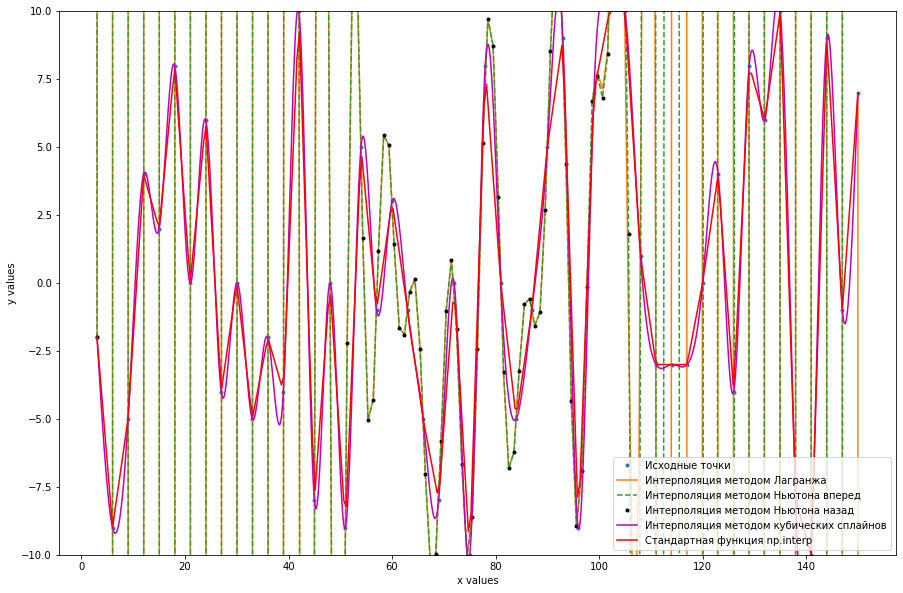

In [21]:
fig, ax = plt.subplots()
ax.plot(x_list, y_list, '.', label='Исходные точки')
ax.plot(x_values1, y_values1, '-', label='Интерполяция методом Лагранжа')
ax.plot(x_values2_1, y_values2_1, '--', label='Интерполяция методом Ньютона вперед')
ax.plot(x_values2_2, y_values2_2, '.', color = 'k', label='Интерполяция методом Ньютона назад')
ax.plot(x_values3, y_values3, '-', color = 'm', label='Интерполяция методом кубических сплайнов')
ax.plot(x_values4, y_values4, '-', color = 'r', label='Стандартная функция np.interp')


fig.set_size_inches(15, 10)
plt.legend()
plt.ylim(min(y_list), max(y_list))
plt.ylabel('y values')
plt.xlabel('x values')
plt.show()

# Изучив график, мы пришли к выводу, что функция np.interp основана на методе сплайнов, но не кубических, а линейных

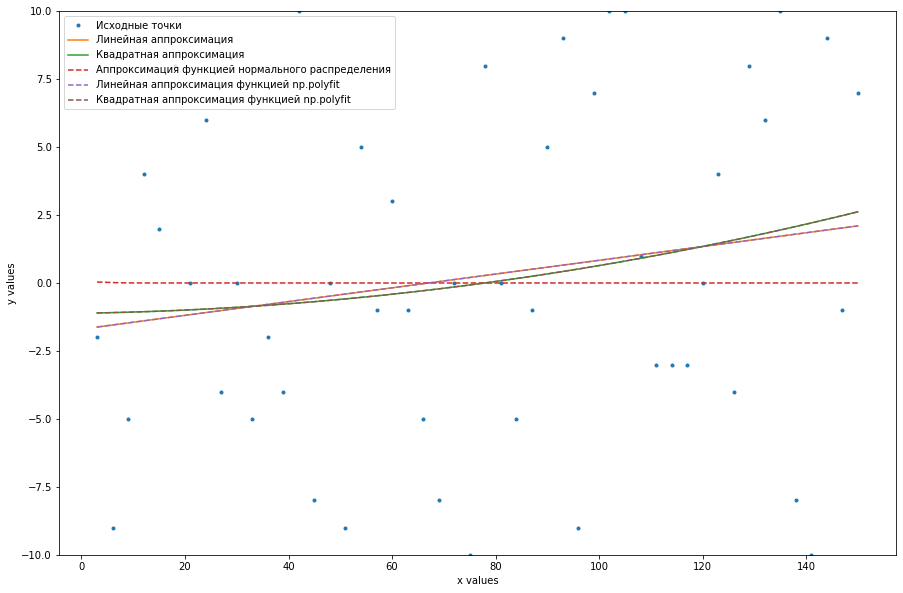

In [19]:
fig, ax = plt.subplots()
ax.plot(x_list, y_list, '.', label='Исходные точки')
ax.plot(x_values6_1, y_values6_1, '-', label='Линейная аппроксимация')
ax.plot(x_values6_2, y_values6_2, '-', label='Квадратная аппроксимация')
ax.plot(x_values7, y_values7, '--', label='Аппроксимация функцией нормального распределения')
ax.plot(x_values5_1, y_values5_1, '--', label='Линейная аппроксимация функцией np.polyfit')
ax.plot(x_values5_2, y_values5_2, '--', label='Квадратная аппроксимация функцией np.polyfit')

fig.set_size_inches(15, 10)
plt.legend()
plt.ylim(min(y_list), max(y_list))
plt.ylabel('y values')
plt.xlabel('x values')
plt.show()

# Изучив график, мы пришли к выводу, что функция np.polyfit использует такой же алгоритм наименьших квадратов, как и мы, поэтому они совпадают 